# Redes Neuronales Artificiales 
## Perceptrón Simple


Un Perceptrón simple (PS) es la red neuronal más sencilla que se puede considerar, está conformado por una sola neurona que posee N entradas y una función de transferencia de tipo umbral, tal como se ve en la siguiente figura:

<center><img src="https://drive.google.com/uc?export=view&id=1c-Vh7kN8qvOPIVLYi_VxiFLZGuoZwRCp" width="980" alt="centered image"></center>



Haciendo un pequeño cambio y llevando el umbral $\theta$ hacia la izquierda en las ecuaciones anteriores, podemos definir un nuevo peso
$w_0 = -\theta$ y la entrada $x_0 = 1$ para poder escribir la salida de forma más compacta:

<center><img src="https://drive.google.com/uc?export=view&id=1cThWTtQamhrPvbGwqSo0oqZOS86mXbGP" width="780"></center>

Podemos representar la salida con la siguiente expresión: $$y = sign(\sum\limits_{i=0}^N {x_i w_i})$$

_**sign**_ corresponde a la función signo y es la _función de activación_ del perceptrón simple. 

El PS permite resolver problemas linealmente separables mediante una recta o un hiperplano de separación con ordenada al origen distinta de cero gracias al término de _Bias_

<center><img src="https://drive.google.com/uc?export=view&id=1ciZwhDhjUXMBCT6KFnnD7vPq4Pnt1-J0" height=300></center>

Algoritmo de entrenamiento o _Regla del Perceptrón Simple_

Esta regla puede implementarse siguiendo estos pasos:
1. Inicializar el vector de pesos w con valores aleatorios entre 0 y 1.
2. Presentar un patrón de entrada x y calcular la salida $$y = sign(x_0 w_0 + \sum\limits_{i=1}^N {x_i w_i})$$  Recordemos que $w_0$ es el término de bias y $x_0=1$, podemos representar la suma de productos usando un producto punto entre vectores: $$y = sign( w_0 + \vec{w}^T \cdot \vec{x})$$

3. Calcular el error entre la salida obtenida y la salida deseada $y_d$ $$e = y - y_d$$
4. Ajustar los pesos de la red con la siguiente ecuación: $$ \vec{w} = \vec{w} + \mu \vec{e} \cdot \vec{x}$$ $\mu$ es el coeficiente de aprendizaje o factor de entrenamiento (eta)
5. Volver al paso 2 y repetir el proceso

In [1]:
# Librerías a importar
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
class Perceptron(object):
    """Perceptrón simple.
    
    Parámetros
    ------------
    eta : float
        factor de entrenamiento (entre 0.0 y 1.0)
    n_iter : int
        iteraciones para el entrenamiento.
    random_state : int
        Semilla generadora de números aleatorios para la inicialización de los pesos.
    
    Atributos
    -----------
    w_ : 1d-array
        Pesos despues del entrenamiento.
    mal_clasificados_ : list
        Número de desaciertos en cada época
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Función de entrenamiento.
        Parameters
        ----------
        X : array, shape = [n_muestras, n_caracteristicas]
          vector de entrenamiento
        y : array, shape = [n_muestras]
          vector target.
          
        Returns
        -------
        self : objeto

        """
        
        rgen = RandomState(self.random_state)
        #inicializo los pesos con valores aleatorios entre 0 y 1
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        #self.w_ = np.ones((1 + X.shape[1],1)).flatten()
        self.mal_clasificados_ = []
        self.errores_ = []
        # para cada época
        for _ in range(self.n_iter):
            
            mal_clasificados = 0
            
            # para cada valor de (x, target) en el vector de entrada:x y vector de salida(target):y
            for xi, target in zip(X, y):
                
                # cálculo de la salida 
                y_salida = self.predict(xi)
                # --------cálculo del error y actualización del vector de pesos-------
                error = target - y_salida                
                update = self.eta * (error)
                self.w_[1:] += update * xi
                self.w_[0] += update
                self.errores_.append(error)
                #------------------------------------------------------------------------
                #si update es distinto de 0 la salida predicha difiere de la salida esperada
                mal_clasificados += int(error != 0.0)
                
            self.mal_clasificados_.append(mal_clasificados)
            
        return self

    def calcular_entrada(self, X):
        """cálculo de la entrada al perceptrón"""
        # -------suma de los productos de los valores de entrada y los pesos -----------        
        return np.dot(X, self.w_[1:]) + self.w_[0]
        #-------------------------------------------------------------------------------

    def predict(self, X):
        """devuelve la etiqueta de la clase pertenciente después de aplicar la fn. de activación"""
        # la función de activación es la función signo: 
        # 0 si el resultado de calcular_entrada < 0
        # 1 si el resultado de calcular_entrada >= 0
        return np.where( self.calcular_entrada(X) >= 0.0, 1, 0 )

## Dataset Iris 
El conjunto de datos flor Iris contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris versicolor e Iris virginica), en total 150 muestras. Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros. 

>Nosotros vamos a utilizar nuestro perceptrón para separar dos clases de flores (Iris setosa e Iris versicolor) según dos de sus características: Largo de sépalo (primer columna en el dataset) y largo de pétalo (tercer columna).  

In [4]:
#Iris Dataset: tamaño total 150 datos
#Este dataset está organizado en 50 datos de Iris-setosa, 50 datos de Iris-versicolor y 50 datos de Iris-virginica

#Cargo el Dataset --> Devuelve un dataframe
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

#muestra las últimas 5 líneas del dataset
df.tail()
#print(type(df))
# Observar que el dataset tiene 5 columnas, donde la última corresponde a las etiquetas de las clases esperadas

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# Graficamos el Dataset

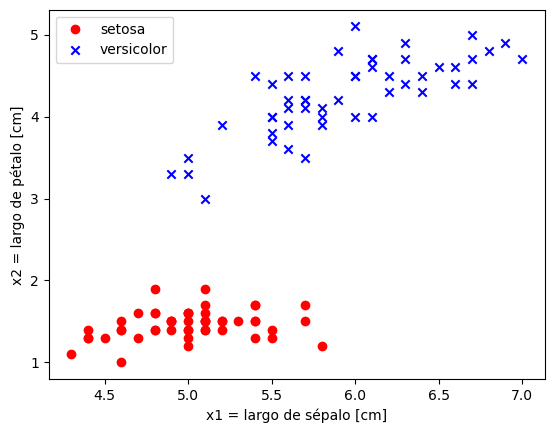

In [5]:
# Target: extraigo 100 etiquetas de clase correspondientes a 50 flores Iris-setosa y 50 Iris-versicolor
y = df.iloc[0:100, 4].values
#print(y)

#convertimos las etiquetas de clases en  0 (Iris-setosa)  y 1 (Iris-versicolor)
y = np.where(y == 'Iris-setosa', 0, 1)
#print(y)

#Extraigo la primera y tercera columna del dataset como características de entrada
# columna 0 : longitud de sépalo, columna 2 : longitud de pétalo
X = df.iloc[0:100, [0, 2]].values
#print(X)

#plot de los datos
plt.scatter( X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter( X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('x1 = largo de sépalo [cm]')
plt.ylabel('x2 = largo de pétalo [cm]')
plt.legend(loc='upper left')
plt.show()

#Hasta aquí tenemos la distribución de una muestra de flores del dataset Iris teniendo en cuenta dos características
#longitudes del sépalo y pétalo 

# Entrenamiento del Perceptrón

[-0.03749765 -0.0395732   0.08253036]


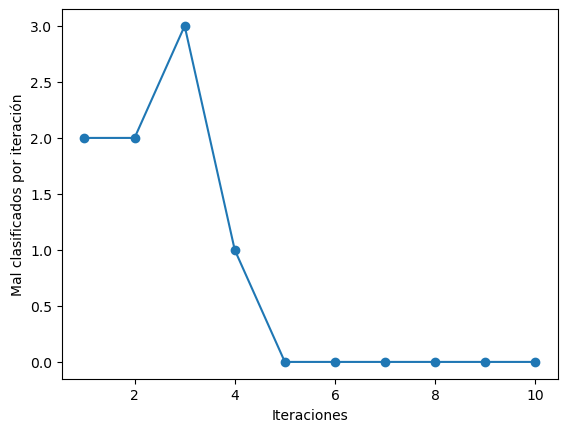

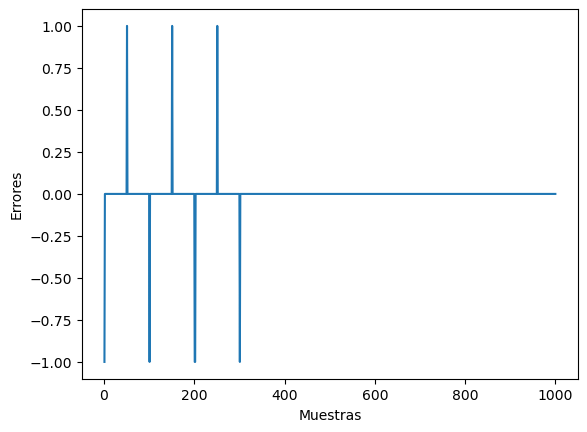

In [6]:
#Instancio un objeto de la clase Perceptron
perceptron = Perceptron(eta=0.01, n_iter=10, random_state=100)

#llamo a su método fit
perceptron.fit(X,y)
print(perceptron.w_)

#Grafico el número de errores por época
plt.plot( range(1, len(perceptron.mal_clasificados_)+1),  perceptron.mal_clasificados_,  marker = 'o' )
plt.xlabel('Iteraciones')
plt.ylabel('Mal clasificados por iteración')
plt.show()

#Grafico el número de errores por época
plt.plot( range(1, len(perceptron.errores_)+1),  perceptron.errores_)
plt.xlabel('Muestras')
plt.ylabel('Errores')
plt.show()

Recordemos la ecuación: $$y = sign(w_0 + \sum\limits_{i=1}^N {x_i w_i})$$ 

Para este problema con dos características (x1 = longitudes del sépalo y x2= longitudes de pétalo ), la ecuación resulta: 

$$y = sign(x_1 w_1 + x_2 w_2 + w_0)$$ 

Donde se separan las dos clases de flores, tendremos la frontera de decisión, dada por la ecuación:

$$x_1 w_1 + x_2 w_2 + w_0 = 0$$ 

De esta ecuación podemos despejar la recta $x_2$ en función de $x_1$ que separa las clases en el espacio de soluciones

$$x_2 + x_1 \frac{w_1}{w_2} + \frac{w_0}{w_2} = 0$$ 

$$x_2 =  -\frac{w_1}{w_2}x_1 - \frac{w_0}{w_2} $$ 

La pendiente de la recta  $ m = -\frac{w_1}{w_2}$ y la ordenada al origen $ b = - \frac{w_0}{w_2}$

### _Ahora vamos a graficar esta recta_

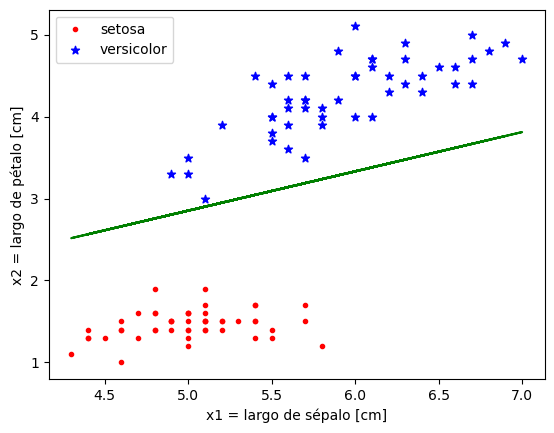

In [7]:
#------------------ Representación de la recta ------------------------------------
# vector de pesos del perceptrón entrenado
w = perceptron.w_
# cálculo de la pendiente
m = - w[1]/w[2]
# cálculo de la ordenada al origen
b = - w[0]/w[2]
# x1 corresponde a la longitud de sépalos
x1 = X[:, 0]
x2 = m*x1 + b
# ----------------------------------------------------------------------------------

#plot de la recta
plt.plot(x1, x2, color='green')
#plot de los datos
plt.scatter( X[:50, 0], X[:50, 1], color='red', marker='.', label='setosa')
plt.scatter( X[50:100, 0], X[50:100, 1], color='blue', marker='*', label='versicolor')
plt.xlabel('x1 = largo de sépalo [cm]')
plt.ylabel('x2 = largo de pétalo [cm]')
plt.legend(loc='upper left')
#plt.xlim([4, 7])
plt.show()

In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, clasificador, test_idx=None, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'o', '^', 'v', 'x')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = clasificador.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c="None",
                    edgecolor='black',
                    alpha=1,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

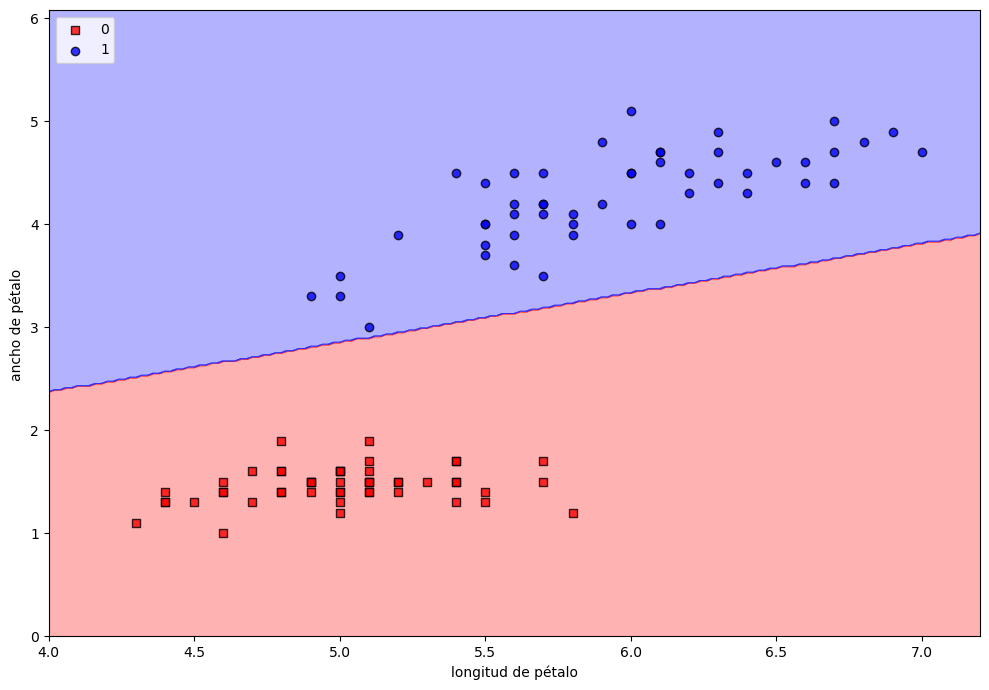

In [9]:
plt.figure(figsize=(10,7))
plot_decision_regions(X,y, perceptron)
plt.xlabel('longitud de pétalo')
plt.ylabel('ancho de pétalo ')
plt.xlim([4, 7.2])
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()